In [23]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from textblob import TextBlob

In [2]:
reviews = pd.read_csv('amazon_reviews_sample.csv', index_col=0)

In [3]:
#original data-frame:

reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [4]:
pos_rev = reviews.review.str.cat(sep=' ')

In [5]:
#creating a wordcloud for positive revs

my_stopwords = set(STOPWORDS)

In [6]:
pos_wordcloud = WordCloud(background_color='WHITE').generate(pos_rev)

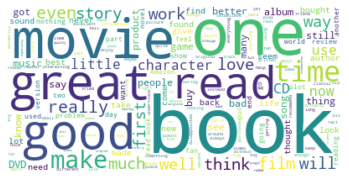

In [7]:
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
#Creating a column for the length of the reviews and adding it to the dataset:

word_token = [word_tokenize(review) for review in reviews.review]

len_rev = []
for i in range(len(reviews)):
    len_rev.append(len(word_token[i]))
    
reviews['total_rev_len'] = len_rev

In [9]:
#the new created data-frame is:

reviews.head()

,score,review,total_rev_len
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


In [10]:
#creating a vectorizer using TfidfVectorizer for our classifier

vect = TfidfVectorizer(max_features=1000, stop_words = ENGLISH_STOP_WORDS,
                       ngram_range=(1, 2),
                       token_pattern = r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)

In [11]:
#transforming textual into numerical data

X_vect = vect.transform(reviews.review)
rev_transformed = pd.DataFrame(X_vect.toarray(), columns=vect.get_feature_names())

In [12]:
rev_transformed.head()

,able,absolutely,acting,action,actor,actors,actual,actually,adapter,add,...,writing,written,wrong,wrote,year,year old,years,years ago,yes,young
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.150955,0.0,0.0,0.0
2,0.0,0.135558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.104058,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.211078,0.0,0.0,0.000000,0.0,0.0,0.0


In [13]:
#Building a cliassifier

rev_transformed['score'] = reviews.score

In [14]:
y = rev_transformed.score
X = rev_transformed.drop('score', axis=1)

In [15]:
#dividing training and testing dataset with 20% testing data-set

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=456)

In [ ]:
#training the logistic regression model

log_reg = LogisticRegression(penalty='l2',C=1000).fit(X_train, y_train)


In [28]:
#measuring the accuracy of our model

y_predict = log_reg.predict(X_test)
print("The accuracy of testing data is: ", accuracy_score(y_test, y_predict))

The accuracy of testing data is:  0.822


In [18]:
#creating the confusion matrix

print(confusion_matrix(y_test, y_predict)/len(y_test))

[[0.436 0.09 ]
 [0.088 0.386]]
